In [74]:
class MyClass():
    def __init__(self, k):
        self.list1 = k
        self.list2 = []
        
        j = 0
        while j < len(self.list1):
            i = 0
            while i < len(self.list1):
                if self.list1[i]%self.list1[j] == 0:
                    tup = self.list1[j],self.list1[i]
                    self.list2.append(tup)
                i += 1
            else:
                None
            j = j + 1
        else:
            None
        
        self.reflexive_list = []
        j = 0
        z = 0
        while j < len(self.list1):
            i = 0
            while i < len(self.list1):
                if self.list1[i] == self.list1[j]:
                    tup = self.list1[j],self.list1[i]
                    self.reflexive_list.append(tup)
                i += 1
            else:
                None
            j = j + 1
        else:
            None
            
        self.result = {}
        for first, second in self.list2:
            self.result.setdefault(first, []).append(second)
        
        self.primes = []
        for num in self.list1:
            prime = True
            for i in range(2,num):
                if (num%i==0):
                    prime = False
            if prime:
               self.primes.append(num)
            
    
    def checkif_even(self):
        for a in self.list1:
            if a%2 == 0:
                None
            else:
                print("There is odd number in the list.")
                return False
        print("All numbers are even.")
        return True
    
    def check_reflexive(self):

        if len(self.reflexive_list) == len(self.list1):
            print(self.reflexive_list)
            print("It provides the reflexive condition.")
            return True
        else:
            print("It doesn't provides the reflexive condition.")
            return False
    
    def antisymmetric(self):
        antisymettric_list = []
        for b in self.list2:
            swap1 = b[0]
            swap2 = b[1]
            newtuple = (swap2, swap1)
            antisymettric_list.append(newtuple)
    
        for ü in self.reflexive_list:
            if ü in antisymettric_list:
                antisymettric_list.remove(ü)
            else:
                None
    
        print(antisymettric_list)
    
        for q in antisymettric_list:
            if q in self.list2:
                print("It doesn't provides the Anti-Symmetric condition.")
                return False
        print("It provides the Anti-Symmetric condition.")
        return True
        
    def transitive(self):      
        for a, b in self.list2:
            for x in self.result[b]:
                if x in self.result[a]:
                    None
                else:
                    print("There is no ({},{}) in the {}".format(a, x, self.result[a]))
                    return False
        print("It provides the Transitive condition.")
        return True

    def draw_diagram(self):
        pos = {}
        origin = -len(list(self.result.keys()))-5
        randlist = list(range(1,len(list(self.result.keys()))+1))
        for a in (list(self.result.keys())):
            if a == 1:
                pos.setdefault(a, ((len(list(self.result.keys()))/2), -len(list(self.result.keys()))-4))
            elif a in self.primes:
                    pos.setdefault(a, (a, -len(list(self.result.keys()))))
            elif len(list(self.result[a])) == 1:
                exitr = random.choice(randlist)
                pos.setdefault(a,(exitr, 0))
                randlist.remove(exitr)
            else:
                exitr = random.choice(randlist)
                pos.setdefault(a, (exitr, (-len(list(self.result[a])))*2))
                randlist.remove(exitr)
        
        ###
        edges = {}
        list1_reverse = list(self.list1)
        for a in list1_reverse:
            for b in list1_reverse:
                if (a%b==0) and (a != b):
                    edges.setdefault(a, []).append(b)
        
        ###
        edge_list = [(x,y) for x,y in self.list2 if x!=y]
        for i in list(range(1,10)):
            for a, b in edge_list:
                if b in list(edges.keys()):
                    for z in edges[b]:
                        if (z!=a) and (z%a==0):
                            while (a,b) in edge_list:
                                edge_list.remove((a,b))
        ###
        T = nx.DiGraph()
        T.add_nodes_from(list(pos.keys()))
        T.add_edges_from(edge_list)
        plt.figure()
        
        if ( (self.checkif_even() == True) and (self.check_reflexive() == True) and (self.antisymmetric() == True) and (self.transitive()== True) ):
            nx.draw(T, pos, node_color='black', node_size=600, font_size= 15, font_color='yellow', with_labels=True, arrowsize=18)
        else:
            return "There are conditions that are not provided."

In [47]:
example_list1 = list(map(int, input("example_list1: ").split()))

example_list1: 1 2 3 4 5 6 7 8 9


In [5]:
example_list2 = list(map(int, input("example_list1: ").split()))

example_list1: 2 3 5 6 8 16 18


In [6]:
example_list3 = list(map(int, input("example_list1: ").split()))

example_list1: 4 6 8 12 16 18 20 26 28 36


In [75]:
MyClass(example_list3).checkif_even()

All numbers are even.


True

In [76]:
MyClass(example_list3).check_reflexive()

[(4, 4), (6, 6), (8, 8), (12, 12), (16, 16), (18, 18), (20, 20), (26, 26), (28, 28), (36, 36)]
It provides the reflexive condition.


True

In [77]:
MyClass(example_list3).antisymmetric()

[(8, 4), (12, 4), (16, 4), (20, 4), (28, 4), (36, 4), (12, 6), (18, 6), (36, 6), (16, 8), (36, 12), (36, 18)]
It provides the Anti-Symmetric condition.


True

In [78]:
MyClass(example_list3).transitive()

It provides the Transitive condition.


True

All numbers are even.
[(4, 4), (6, 6), (8, 8), (12, 12), (16, 16), (18, 18), (20, 20), (26, 26), (28, 28), (36, 36)]
It provides the reflexive condition.
[(8, 4), (12, 4), (16, 4), (20, 4), (28, 4), (36, 4), (12, 6), (18, 6), (36, 6), (16, 8), (36, 12), (36, 18)]
It provides the Anti-Symmetric condition.
It provides the Transitive condition.


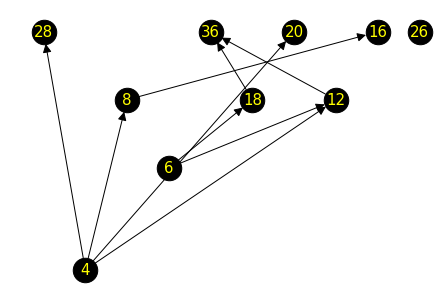

In [79]:
MyClass(example_list3).draw_diagram()